##Reproduction of the results in the paper "Good Agreements make good friends" Anh et al. 2013

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [51]:
import egttools as egt

In [52]:
egt.Random.init()
seed = egt.Random._seed

In [53]:
# Payoff matrix
R=1;P=0;T=2;S=-1
beta=0.1
delta=4
eps=0.25

A = np.array([
        [ R-(eps/2), R-eps,0,S+delta-eps,R-eps],
        [R,R,S,S,S],
        [0,T,P,P,P],
        [T-delta,T,P,P,P],
        [R,T,P,P,P],
    ])

In [54]:
A

array([[ 0.875,  0.75 ,  0.   ,  2.75 ,  0.75 ],
       [ 1.   ,  1.   , -1.   , -1.   , -1.   ],
       [ 0.   ,  2.   ,  0.   ,  0.   ,  0.   ],
       [-2.   ,  2.   ,  0.   ,  0.   ,  0.   ],
       [ 1.   ,  2.   ,  0.   ,  0.   ,  0.   ]])

In [55]:
strategy_labels=['Commit','C','D','Fake','Free']

In [56]:
strategy_labels

['Commit', 'C', 'D', 'Fake', 'Free']

In [57]:
game = egt.games.Matrix2PlayerGameHolder(5, A)

In [58]:
Z=100
evolver = egt.analytical.PairwiseComparison(Z, game)

In [59]:
beta=0.1
transition_matrix,fixation_probabilities = evolver.calculate_transition_and_fixation_matrix_sml(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix.transpose())
stationary_distribution

array([0.68234873, 0.04628221, 0.13936393, 0.02645491, 0.10555022])

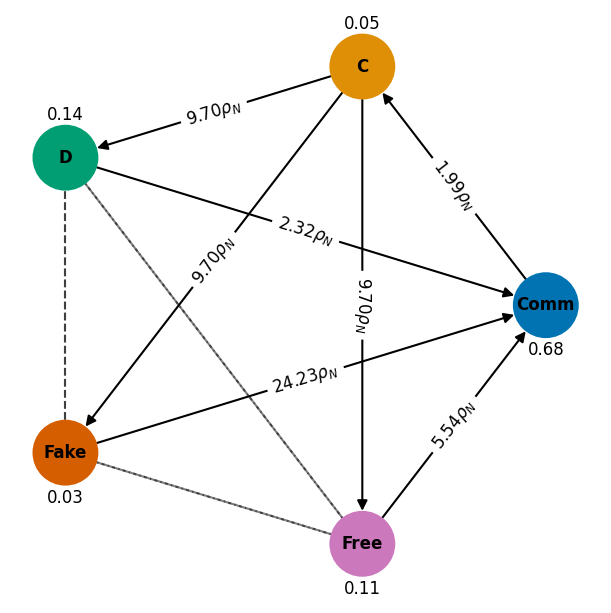

In [60]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_invasion_diagram(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=1000,
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=0.00001,
                                              ax=ax)
plt.axis('off')
plt.show() # display

In [61]:
from tqdm import tqdm
epss=np.linspace(0, 1.5, 30)
sds=[]

for eps in tqdm(epss):
    A = np.array([
        [ R-(eps/2), R-eps,0,S+delta-eps,R-eps],
        [R,R,S,S,S],
        [0,T,P,P,P],
        [T-delta,T,P,P,P],
        [R,T,P,P,P],
    ])
    game = egt.games.Matrix2PlayerGameHolder(5, A)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    transition_matrix,fixation_probabilities = evolver.calculate_transition_and_fixation_matrix_sml(beta)
    stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix.transpose())
    sds.append(stationary_distribution)

sds = np.asarray(sds)
sds

100%|█████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 70.64it/s]


array([[0.84161992, 0.02796467, 0.07616534, 0.0138176 , 0.04043247],
       [0.81291484, 0.03207519, 0.08866863, 0.01624642, 0.05009493],
       [0.78184807, 0.0361497 , 0.10170382, 0.01881354, 0.06148487],
       [0.74859705, 0.04004933, 0.1150228 , 0.02147546, 0.07485536],
       [0.71328997, 0.04363404, 0.1283782 , 0.02418772, 0.09051008],
       [0.67599682, 0.04676756, 0.14153274, 0.02690675, 0.10879613],
       [0.6367492 , 0.04932184, 0.15426267, 0.02959054, 0.13007575],
       [0.59559161, 0.0511828 , 0.16635784, 0.03219876, 0.15466898],
       [0.55266067, 0.0522594 , 0.17762238, 0.03469281, 0.18276474],
       [0.50827773, 0.05249686, 0.18788041, 0.03703676, 0.21430823],
       [0.46302686, 0.05189229, 0.19698954, 0.03919993, 0.24889139],
       [0.41777996, 0.05050767, 0.20486102, 0.04116071, 0.28569065],
       [0.37363635, 0.04847291, 0.21148026, 0.04291092, 0.32349956],
       [0.33177298, 0.04597329, 0.21691799, 0.04445856, 0.36087719],
       [0.29324535, 0.04322175, 0.

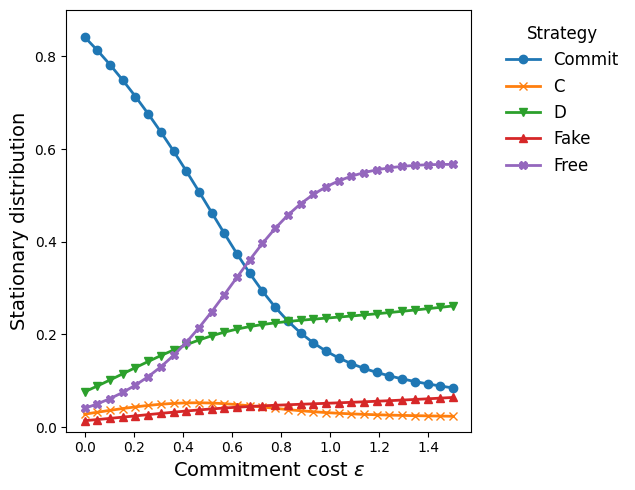

In [62]:
import pandas as pd
import seaborn as sns

labels = ['epsilon'] + strategy_labels
markers = ['o', 'x', 'v', '^', 'X', '*', 'h', '1']
#colors=colors = sns.color_palette("icefire", 8)

fig, ax = plt.subplots(figsize=(7, 5))

for i in range(5):
    ax.plot(epss, sds[:,i],linewidth=2,label=strategy_labels[i], marker=markers[i])

ax = plt.gca()
ax.set_ylim(-0.01, 0.9)
ax.set_ylabel('Stationary distribution', fontsize=14)
ax.set_xlabel('Commitment cost $\epsilon$', fontsize=14)
plt.legend(title="Strategy", loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False, fontsize=12,
          title_fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig(
    f"./commitment_delta_{delta}_Z_{Z}_beta_{beta}.png",
    bbox_inches='tight', dpi=300)